In [2]:
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

data=pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv', sep=',')

Анализ экспрессии генов лейкоцитов. В эксперименте исследовался уровень экспресси генов в зависимости от возраста пациентов и дозировки лекартва аторвастатина.

Age (возраст):
- 1: молодые
- 2: пожилые

Dose (дозировка):
- D1: высокая
- D2: низкая

Независимые переменные: возраст и дозировка. Зависимая переменная: уровень экспрессии генов.

In [20]:
data.groupby(['age','dose'])['expr'].agg(['count', 'mean', 'std']).reset_index()

,age,dose,count,mean,std
0,1,D1,16,104.758464,5.863454
1,1,D2,16,105.545864,4.369024
2,2,D1,16,101.004805,5.116310
3,2,D2,16,102.273629,5.135374


Получается 4 группы испытуемых.

Основная идея: общая изменчивость = внутригрупповая изменчивость + изменчивость обусловленная влиянием первого фактора + изменчивость обусловленная влиянием первого второго фактора + изменчивость обусловленная взаимодействием двух факторов

SStotal = SSW + SSB(a) + SSB(b) + SSB(a)*SSB(b)

               sum_sq  df         F    PR(>F)
age        197.452754   1  7.449841  0.008313
dose        16.912241   1  0.638094  0.427552
age:dose     0.927077   1  0.034978  0.852272
Residual  1590.257424  60       NaN       NaN


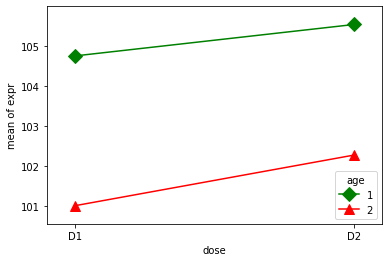

In [3]:
#Картинка
fig=interaction_plot(data.dose,data.age,data.expr,colors=['green','red'], markers=['D','^'], ms=10)
#Степени свободы
N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = data['expr'].mean()
#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)

Расчитаны степени свободы и суммы квардратов для каждого из показателей. Большая часть изменчивости благодаря фактору возраста **(sum_sq = 197.452754)**. А фактор дозировки и внутригрупповая изменчивость оказались незначительны. 

p-значение в age оказалось ниже 0,05, следовательно отклоняем Н0 о равенстве двух средних между молодыми и пожилыми людьми. Влияние возраста статистически значимо, чтобы отклонить Н0. Среднее значение для зеленых средних значений (молодые) выше, чем красные средние значения (пожилые). **Значимый эффект оказался для фактора возраста, но не значимый эффект оказался для фактора дозировки.**